# Librerías

In [9]:
import pandas as pd
import numpy as np
import csv
import string
import re
import seaborn as sn
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Feature Engineering

In [2]:
# Se carga el CSV con la información ya procesada post proceso de ETL

lista_rows = []

with open('/Users/mlucchesi/Henry/PI/data/csv/procesados/users_reviews_procesado.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)
    for row in csv_reader:
        lista_rows.append(row)

# Se transponen las filas, guardadas en listas, para que queden como columnas

df_user_reviews = pd.DataFrame(lista_rows, columns=headers)

In [3]:
# Se mnuestra

df_user_reviews.head()

,,user_id,user_url,posted,item_id,helpful,recommend,review
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,2,evcentric,http://steamcommunity.com/id/evcentric,Posted February 3.,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,3,doctr,http://steamcommunity.com/id/doctr,"Posted October 14, 2013.",250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,4,maplemage,http://steamcommunity.com/id/maplemage,"Posted April 15, 2014.",211420,35 of 43 people (81%) found this review helpful,True,Git gud


In [4]:
''' 
Se define la función "sentiment_analysis" que analiza la review del usuario y la cataloga como:
- negativa: le asigna el valor "0"
- sin especificar o con vlaor nulo: le asigna el valor "1"
- positiva: le asigna el valor "2" 
'''

def sentiment_analysis(text):
    if pd.isnull(text):
        return 1
    else: polarity = TextBlob(str(text)).sentiment.polarity
    if polarity < 0:
        return 0
    elif polarity == 0:
        return 1
    else:
        return 2

In [5]:
# Se crea la columna 'sentiment_analysis' con base en el valor de 'review' para cada registro

df_user_reviews['sentiment_analysis'] = df_user_reviews['review'].apply(sentiment_analysis)

# Luego, se dropea la columna 'review' para solo conservar la creada recientemente

df_user_reviews.drop('review', axis=1, inplace=True)

In [6]:
# Se extra solo la columna con el resultado del análisis de la review

only_reviews_polarity = df_user_reviews[['user_id', 'item_id', 'sentiment_analysis']]
only_reviews_polarity.head()

,user_id,item_id,sentiment_analysis
0,76561197970982479,1250,2
1,js41637,251610,2
2,evcentric,248820,2
3,doctr,250320,2
4,maplemage,211420,1


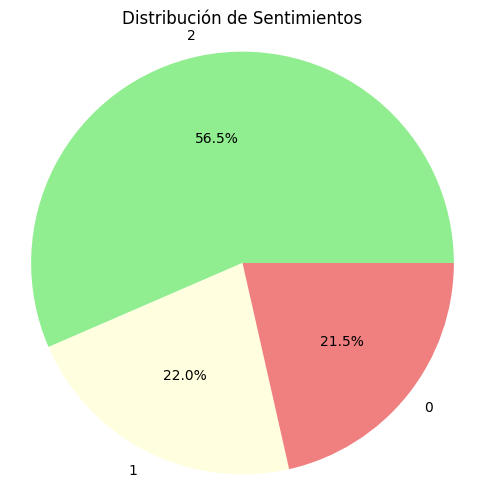

In [7]:
# Muestra en un gráfico el porcentaje de juegos con review positiva, negativa, y nula

value_counts = only_reviews_polarity['sentiment_analysis'].value_counts(normalize=True) * 100

colores = ['lightgreen', 'lightyellow', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colores)
plt.title('Distribución de Sentimientos')
plt.axis('equal')
plt.show()

In [8]:
# Exporto a CSV

only_reviews_polarity.to_csv('/Users/mlucchesi/Henry/PI/data/csv/NLP/reviews_polarized.csv', index=False)